# GRIP Internship Task 6: Prediction using a Decision Tree Algorithm 

### Goal: 
1. Create a decision tree classifier and visualize it graphically. <br>
2. Predict test data using the classifier </br>
3. Improve the classifier through feature selection methods (optional)

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier #Imports the decision tree classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# creating the iris dataframe
X = pd.DataFrame(iris.data[:], columns=iris.feature_names[:])
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
Y = pd.DataFrame(iris.target, columns=["Species"])
Y.sample(10)

,Species
45,0
124,2
39,0
55,1
8,0
38,0
142,2
16,0
122,2
95,1


Setosa flowers - 0 <br> Versicolor - 1 <br> Virginica - 2

In [5]:
# splitting the dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# defining the decision tree algo
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

print('Decision Tree: done')

Decision Tree: done


In [7]:
# predicting the test dataset
Y_pred = decision_tree.predict(X_test)

In [8]:
# evaluating the model
print("Accuracy without feature selection:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy without feature selection: 0.9555555555555556


The accuracy is high without even applying feature engineering. </br>

Now, I visualized the decision tree algorithm without feature engineering.

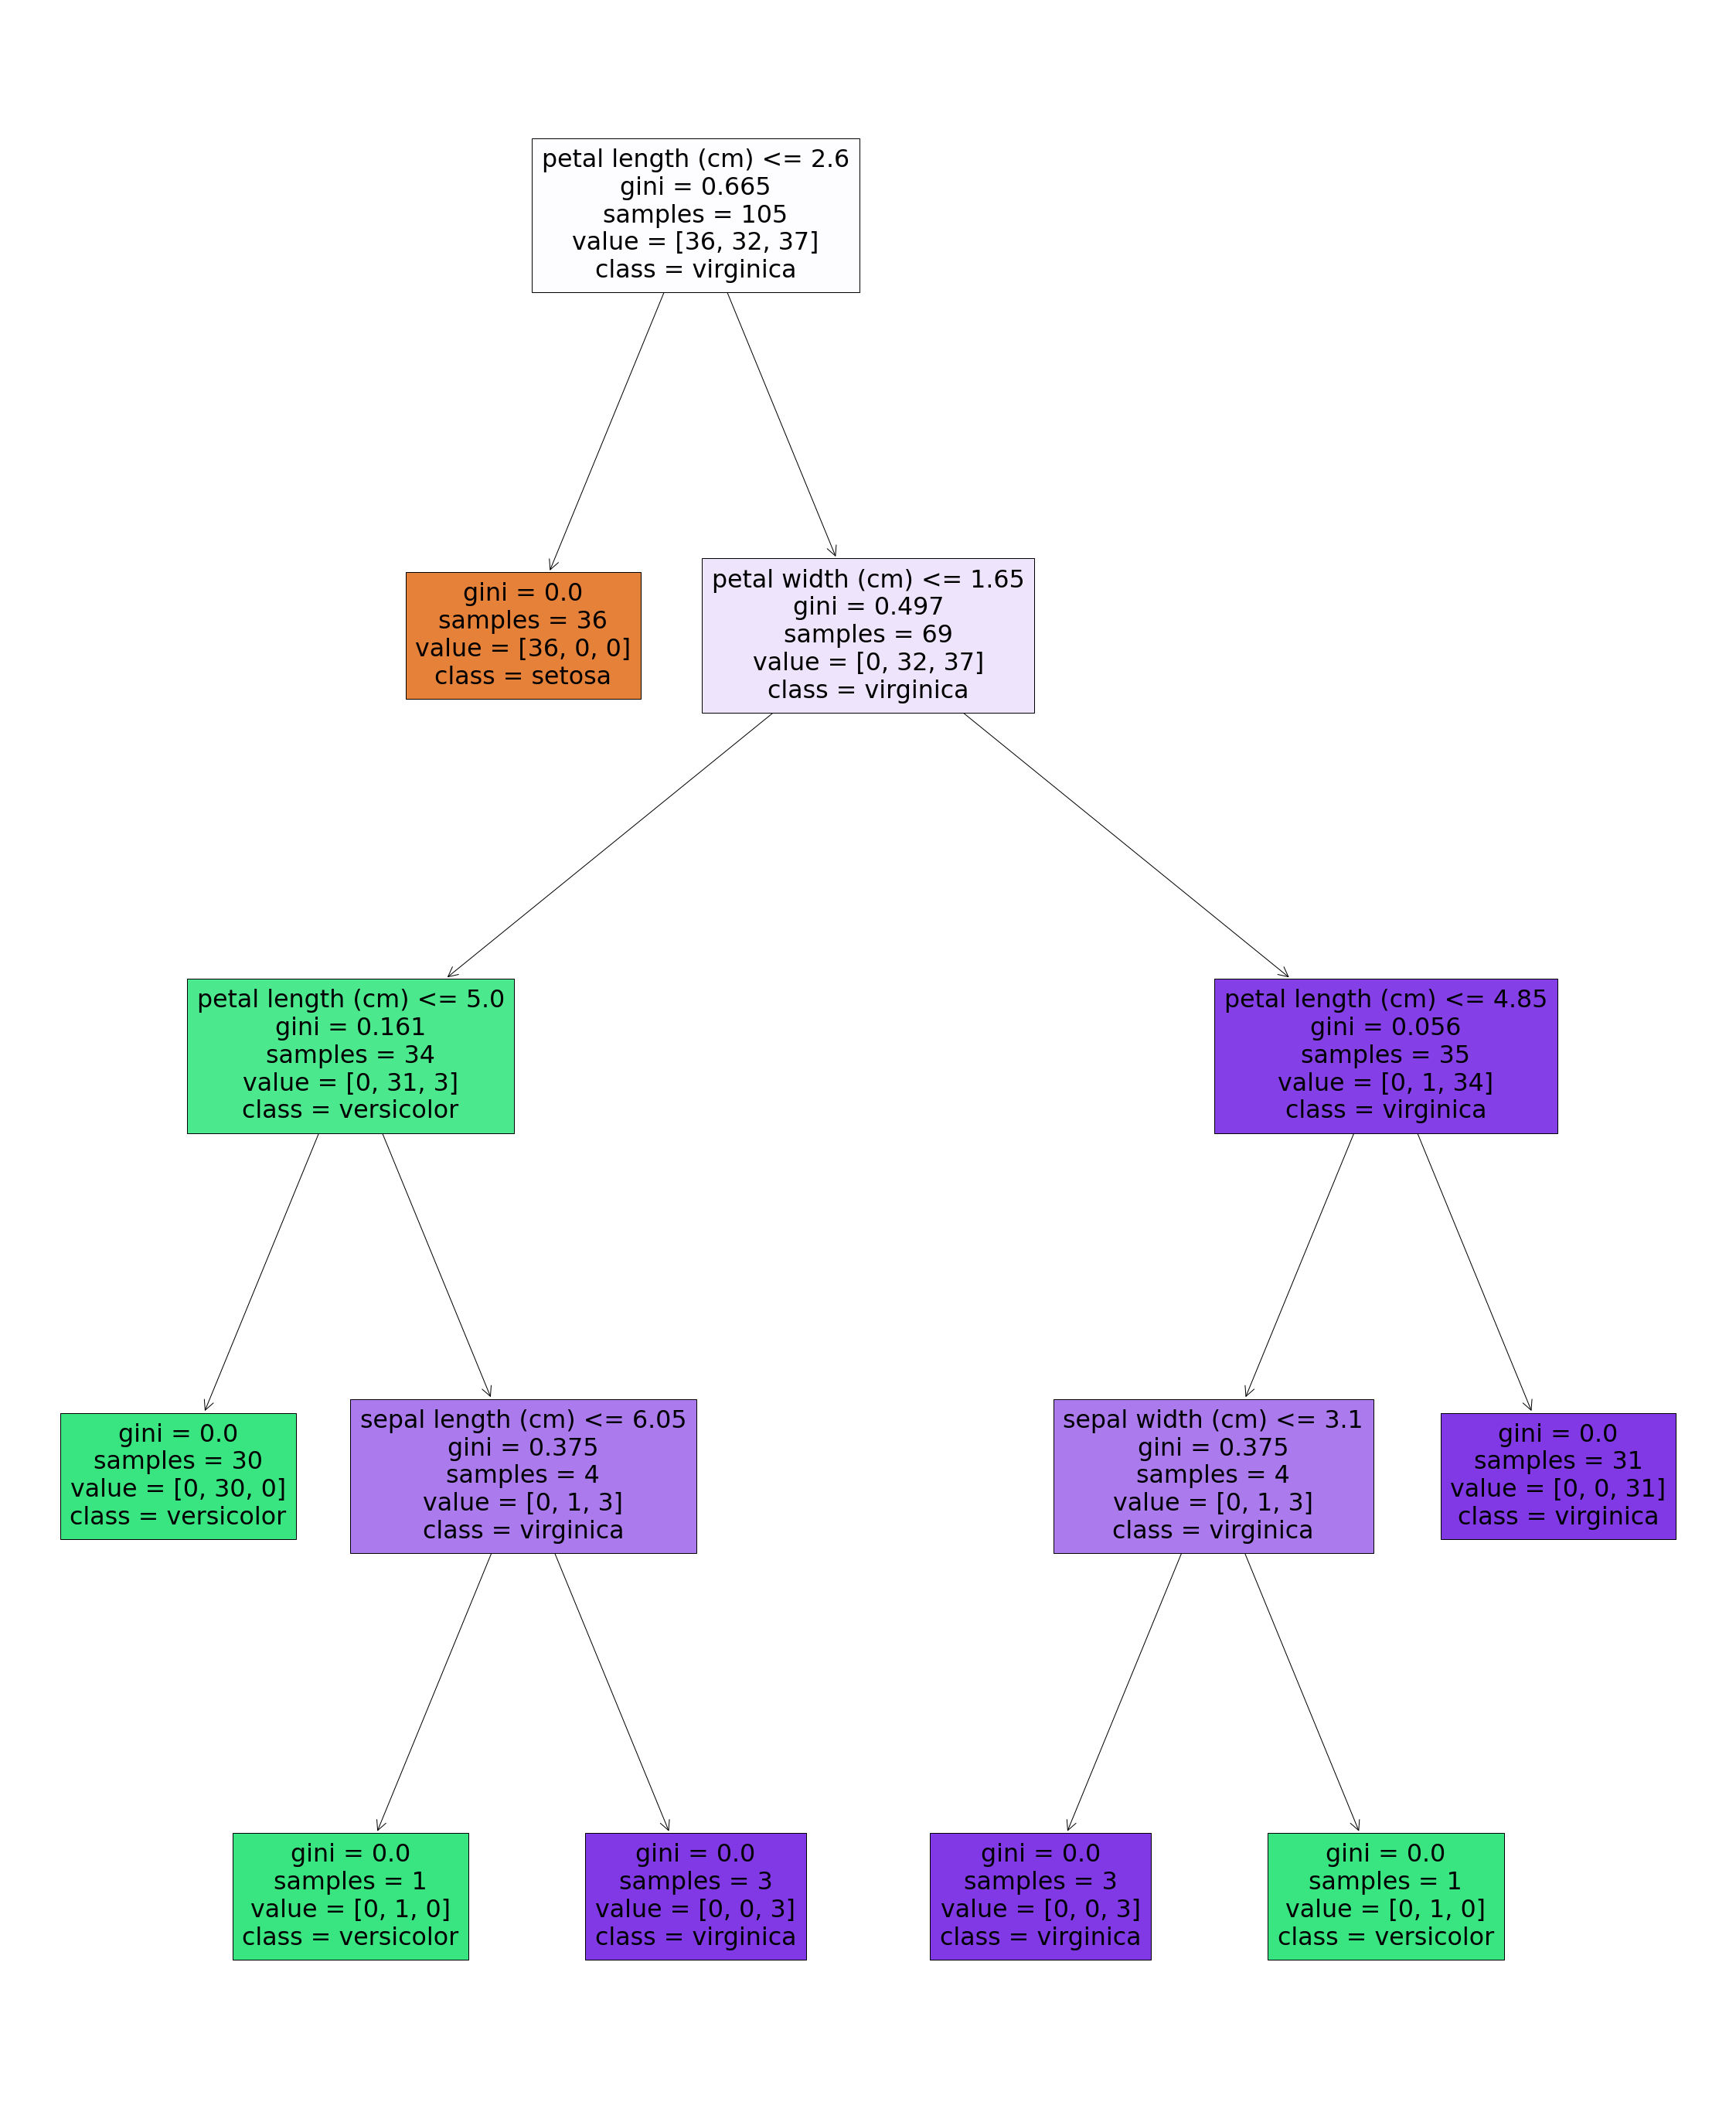

In [9]:
# import libraries for visualization of the decision tree algorithm 
from sklearn import tree
fig = plt.figure(figsize=(40,50))
viz = tree.plot_tree(decision_tree, feature_names=X.columns, class_names=iris.target_names, filled=True)

### The accuracy of the decision tree algorithm can be further improved through feature selection methods like the following:
1. Univariate Selection </br>
2. Correlation Matrix with Heatmap  </br> 

Reference : https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [10]:
# applyng the first feature selection method
## Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print best features

               Specs       Score
2  petal length (cm)  116.312613
3   petal width (cm)   67.048360
0  sepal length (cm)   10.817821
1   sepal width (cm)    3.710728


Petal length has the greatest correlation with the target so I dropped the other three and see how the model's accuracy would look like. </br>

Another method is using a correlation heatmap to determine which features are most related to the target value

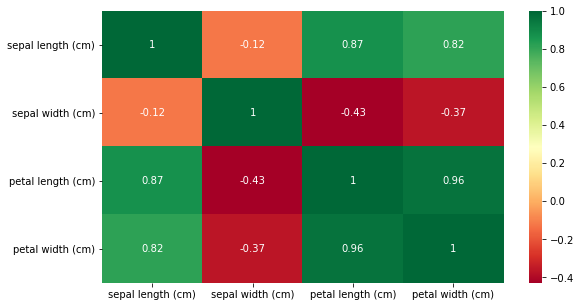

In [19]:
# Correlation heatmap
import seaborn as sns # for heatmap visualization

# get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,5))
#plot heat map
hm = sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
# dropping the other columns with the less correlated feature with the target
X_univ = X.drop(columns=['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)'])

# training the X_univ dataset again
# splitting the dataset into training and test set
X_train_univ, X_test_univ, Y_train, Y_test = train_test_split(X_univ, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [13]:
# fitting the decision tree algo
decision_tree.fit(X_train_univ, Y_train)
print("Decision Tree: Done")

Decision Tree: Done


In [14]:
# predicting the test dataset
Y_pred_univ = decision_tree.predict(X_test_univ)

# printing the accuracy of the model with feature selection
print("Accuracy with feature selection:",metrics.accuracy_score(Y_test, Y_pred_univ))

Accuracy with feature selection: 0.9777777777777777


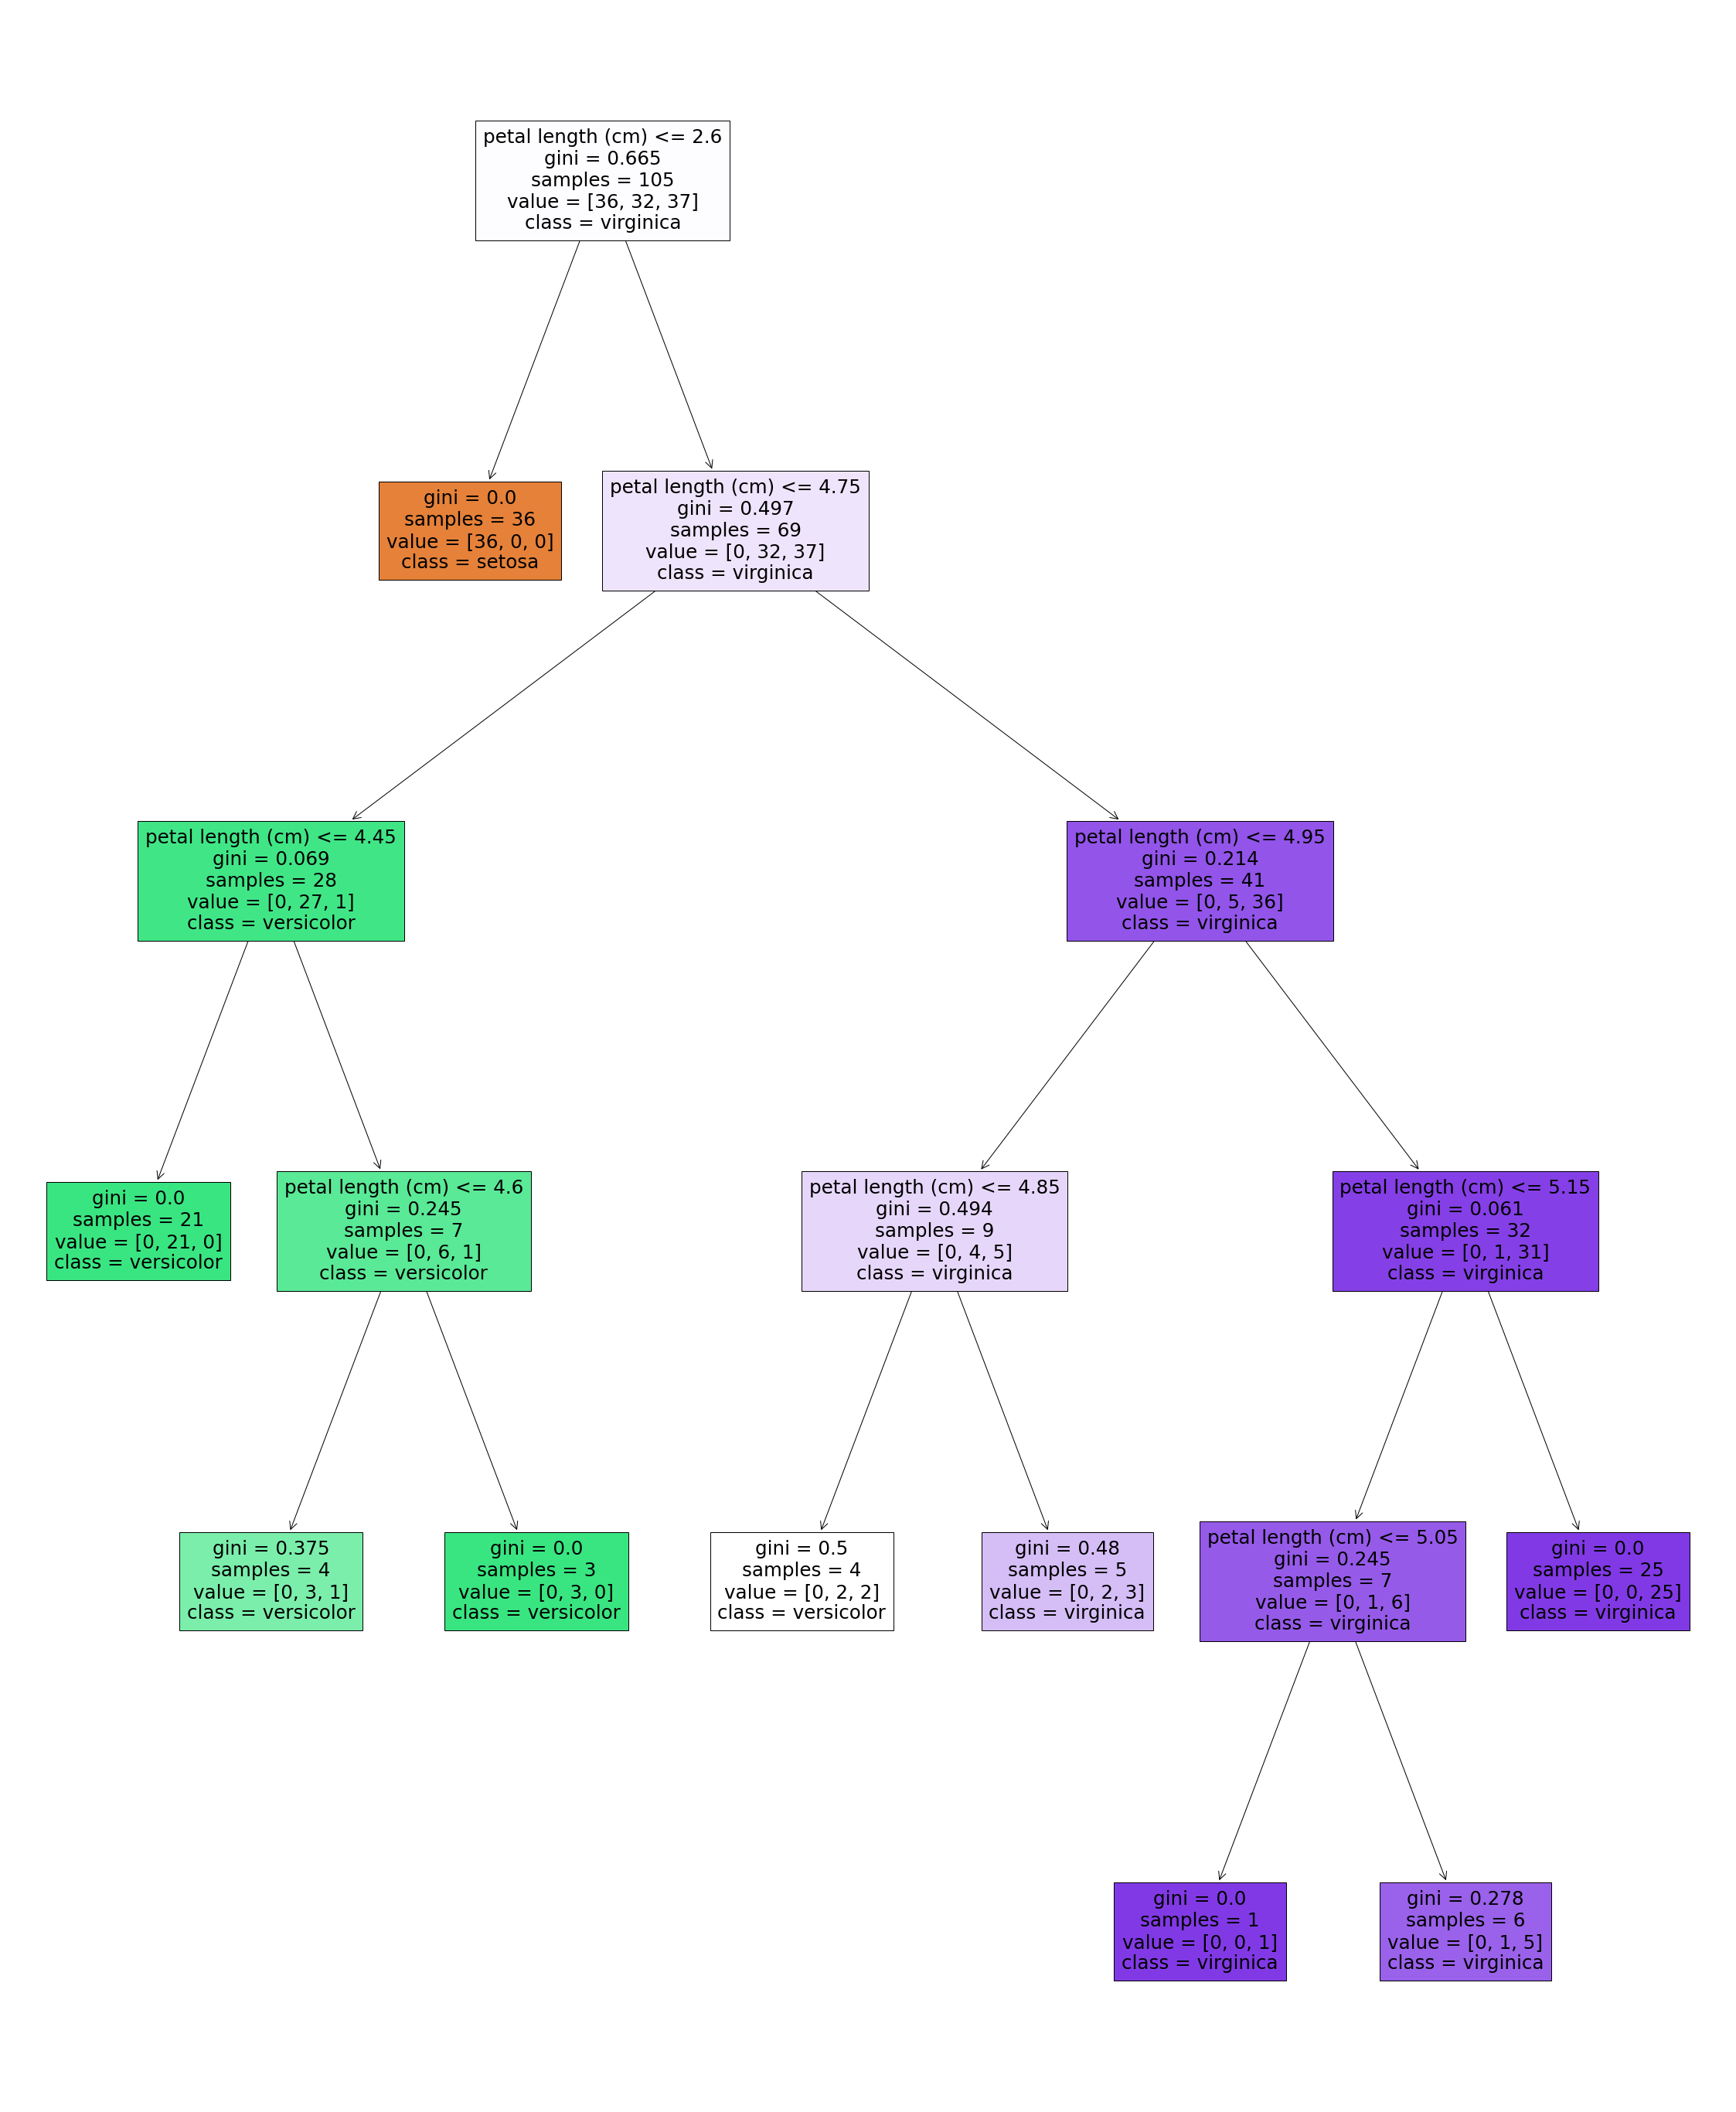

In [15]:
# visualizing the decision tree with univariate selection
fig = plt.figure(figsize=(40,50))
viz = tree.plot_tree(decision_tree, feature_names=X_univ.columns, class_names=iris.target_names, filled=True)

A difference in the decision structure can be observed after removing the less correlated features in the dataset. 

### Summary
I was able to predict the iris dataset with decent accuracy scores using the decision tree algorithm. From the results, applying feature selection methods on the dataset improves the accuracy of the algorithm shown by the following results:

In [16]:
print("Accuracy without feature selection:",metrics.accuracy_score(Y_test, Y_pred))
print("Accuracy with feature selection:",metrics.accuracy_score(Y_test, Y_pred_univ))

Accuracy without feature selection: 0.9555555555555556
Accuracy with feature selection: 0.9777777777777777
